<a href="https://colab.research.google.com/github/sergioopereira/AI/blob/main/mod4_redes_neurais/Code/Model/cenario2/01_RegressaoLinear-Multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### *A) Importar Dados de Vento, Direção, Pressao e Temperatura*

In [2]:
import os
cwd = os. getcwd()
print(cwd)

/content


In [3]:
#source_file =   '../../../../PrevisaoVento/Data/process/cenario2/dados_cenario2.csv'
source_file =   'dados_cenario2.csv'
df_wind = pd.read_csv(source_file, delimiter=';', index_col=0, parse_dates=['Data'])
df_wind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8807
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Longitude     8808 non-null   float64       
 1   Latitude      8808 non-null   float64       
 2   Data          8808 non-null   datetime64[ns]
 3   VentoC        8808 non-null   float64       
 4   Pressao       8808 non-null   float64       
 5   Temperatura   8808 non-null   float64       
 6   DirecaoVento  8808 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 550.5 KB


In [4]:
df_wind.isnull().sum() # registros nulos

Longitude       0
Latitude        0
Data            0
VentoC          0
Pressao         0
Temperatura     0
DirecaoVento    0
dtype: int64

### <span style="color:Blue"> ***D) Regressão Linear*** 

### <span style="color:#4169E1">**D1. Cálculos**

- slope = Inclinação da linha de regressão.<br>
- intercept= Interceptação da linha de regressão.<br>
- rvalue = Coeficiente de correlação.<br>
- pvalue= Valor p bilateral para um teste de hipótese cuja hipótese nula é que a inclinação é zero, usando o Teste de Wald com distribuição t da estatística de teste<br>
- stderr = (Desvio)Erro padrão da inclinação estimada (gradiente), considerando a normalidade residual.<br>


In [5]:
x = df_wind['Temperatura'] 
y = df_wind['VentoC']
a, b, r, p, std_err = stats.linregress(x,y)

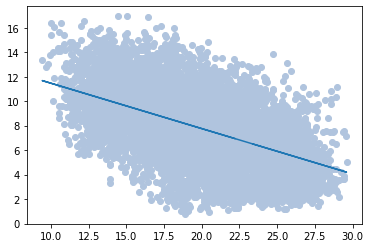

In [6]:
def estimate_y(x):
    return a * x + b

df_wind['y_Vento'] = df_wind['Temperatura'].apply(estimate_y)  
# A partir da coluna Vento observado, será criado uma nova coluna chamada y_estimado

plt.figure()
plt.plot(df_wind['Temperatura'], df_wind['y_Vento'])
plt.scatter(df_wind['Temperatura'], df_wind['VentoC'], color='#B0C4DE')
plt.show()

<span style="color:#4169E1">**D2. Coeficiente de Determinação**

In [7]:
coef_determinacao = r**2

print("A correlação é de: " + str(coef_determinacao) + " %") # Proximo de 1 é uma boa estimativa

A correlação é de: 0.26135100022080215 %


### <span style="color:#8B008B"> ***E) Regressão Linear Multipla*** 

<b>Formula:</b><br>
<i>
VentoVerificado = b0 + (b1 x VentoObservado) + (b2 x PressaoAtmosferica) + (b3 x Temperatura) + (b4 x Chuva) + (b5 x DirecaoGraus)
</i>
<p>
<b>Avaliação do P-valor:</b>
<br>p-valor = Probabilidade dos valores se referirem à hipotese nula
<br>p-valor baixo -> Melhor associação entre o preditor e o valor

<p><b>Tabela:</b>
<br>p-valor < 0.001 -> Alto nivel de certeza
<br>p-valor < 0.05  -> Nível de certeza moderado
<br>p-valor < 0.01  -> Nível de certeza fraco
<br>p-valor > 0.1  -> Não há nivel de certeza aceitávelno resultado

<i>Ou seja,</i> Coluna P>|t|. Quanto mais próximo o valor for de zero(0), mais correlacionado a variavel é.
<p>
<b>Como Avaliar o Summary:</b><br>
    1. <b><i>Teste F de Significancia  Global</b></i> (O modelo é útil para prever ?)<br>
Resposta: Verifique se o valor da coluna 'Prob(F-statistic) = valor p do teste F' é < 0,05. 
<br>Se houver, significa pelo menos 1 variavel no modelo está correlacionada a variavel dependente
<p>
    2. <b><i>Teste de significancia individua</b></i><br>
Resposta: Na tabela, verifique o valor P>|y| das variaveis independente são menores que 0.05.
<br>Se houver, há evidencias estatisticas de relação.
<p>
    3.<b><i> R2 e R2-Ajustado.</b></i><br>
Resposta: As variaveis independente explicam qual % de variabilidade da variavel dependente.<br>
    Verifique o valor da variavel "R-squared" para responder. Já o R2-Ajustado,que é sempre um pouco menor que o R2
    deve ser usado quando queremos comparar modelos com diferentes quantidades de variaveis.
<p>
<b><i>Quais são os coeficientes da equação</b></i><br>
Resposta: y = coef.intercept + coef.direcao x {valorDirecao} + coef.Magnitude_Observada x {Magnitude_Observada} + ...

#### <span style="color:#8B008B"> **R2 = 0.056 ~ Usando (  Direção )**

In [8]:
# Método: Ordinary Least Square
# Estimador escolhido: R2
#
model = ols('VentoC ~ DirecaoVento' , data = df_wind) 
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VentoC   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     519.1
Date:                Sun, 19 Sep 2021   Prob (F-statistic):          1.08e-111
Time:                        15:54:03   Log-Likelihood:                -21291.
No. Observations:                8808   AIC:                         4.259e+04
Df Residuals:                    8806   BIC:                         4.260e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.5066      0.073    130.233      0.000       9.364       9.650
DirecaoVento    -0.0124      0.001    -22.784      0.000      -0.014      -0.011
==============================================================================
Omnibus:                       10.248   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.391
Skew:                           0.042   Prob(JB):                      0.00914
Kurtosis:                       2.863   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style="color:#8B008B"> **R2 = 0.290 ~  Usando ( Direção + Temperatura )**

In [9]:
model = ols('VentoC ~ Temperatura + DirecaoVento ' , data = df_wind) 
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VentoC   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     1802.
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:54:03   Log-Likelihood:                -20032.
No. Observations:                8808   AIC:                         4.007e+04
Df Residuals:                    8805   BIC:                         4.009e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.9682      0.135    117.929      0.000      15.703      16.234
Temperatura     -0.3545      0.007    -53.977      0.000      -0.367      -0.342
DirecaoVento    -0.0091      0.000    -19.003      0.000      -0.010      -0.008
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.115
Skew:                           0.009   Prob(JB):                        0.944
Kurtosis:                       2.996   Cond. No.                         730.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style="color:#8B008B"> **R2 = 0.205 ~  Usando (Direção + Pressão )**

In [10]:
model = ols('VentoC ~  DirecaoVento + Pressao ' , data = df_wind) 
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VentoC   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     1135.
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:54:03   Log-Likelihood:                -20533.
No. Observations:                8808   AIC:                         4.107e+04
Df Residuals:                    8805   BIC:                         4.109e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -379.7562      9.574    -39.665      0.000    -398.524    -360.989
DirecaoVento    -0.0059      0.001    -11.239      0.000      -0.007      -0.005
Pressao          0.4393      0.011     40.659      0.000       0.418       0.461
==============================================================================
Omnibus:                        5.882   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                6.435
Skew:                           0.007   Prob(JB):                       0.0401
Kurtosis:                       3.132   Cond. No.                     3.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <span style="color:#8B008B"> **R2 = 0.332 ~  Usando (Direção + Temperatura + Pressão )**

In [11]:
model = ols('VentoC ~ Temperatura + DirecaoVento + Pressao ' , data = df_wind) 
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VentoC   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     1456.
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:54:03   Log-Likelihood:                -19769.
No. Observations:                8808   AIC:                         3.955e+04
Df Residuals:                    8804   BIC:                         3.957e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -210.0147      9.714    -21.621      0.000    -229.055    -190.974
Temperatura     -0.2864      0.007    -40.837      0.000      -0.300      -0.273
DirecaoVento    -0.0059      0.000    -12.334      0.000      -0.007      -0.005
Pressao          0.2537      0.011     23.267      0.000       0.232       0.275
==============================================================================
Omnibus:                        1.404   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                1.371
Skew:                           0.017   Prob(JB):                        0.504
Kurtosis:                       3.050   Cond. No.                     3.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""